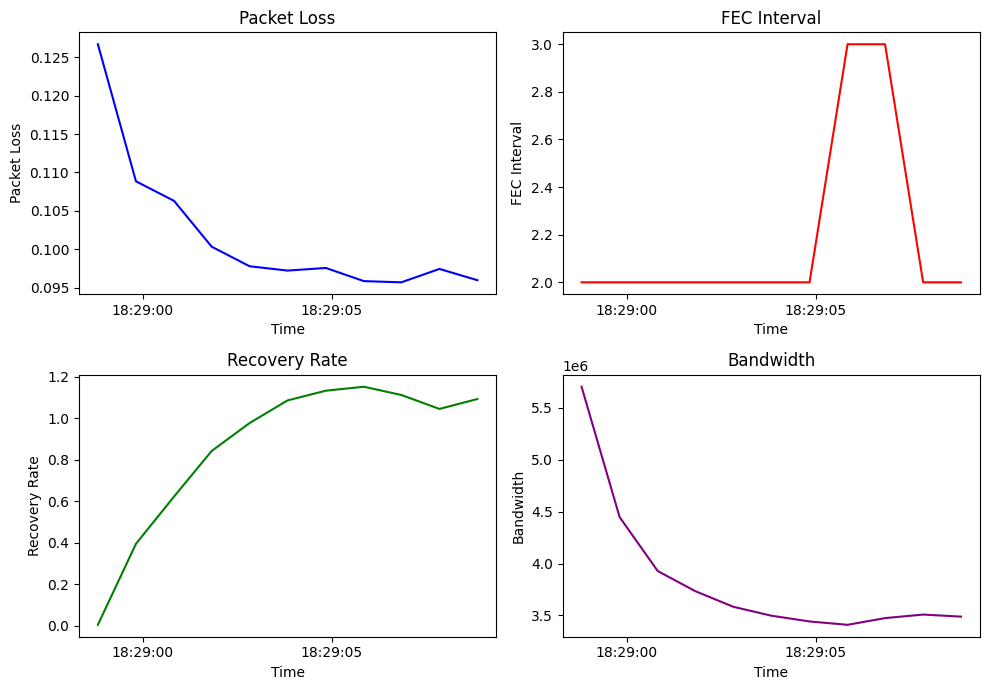

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

# time = []
# packet_loss = []
# fec_interval = []
# recovery_rate = []
# bandwidth = []

# with open('../report/sender_packets.csv', 'r') as csvfile:
#     csvreader = csv.reader(csvfile)
#     next(csvreader)
#     for row in csvreader:
#         time.append(int(row[0]))
#         packet_loss.append(float(row[1]))
#         fec_interval.append(int(row[2]))
#         recovery_rate.append(float(row[3]))
#         bandwidth.append(float(row[4]))

data = pd.read_csv('../report/sender_packets.csv')

data['Time'] = pd.to_datetime(data['Time'], unit='ms')

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.plot(data['Time'], data['Packet loss'], color='b')
plt.title('Packet Loss')
plt.xlabel('Time')
plt.ylabel('Packet Loss')

plt.subplot(2, 2, 2)
plt.plot(data['Time'], data['FEC Interval'], color='r')
plt.title('FEC Interval')
plt.xlabel('Time')
plt.ylabel('FEC Interval')

plt.subplot(2, 2, 3)
plt.plot(data['Time'], data['Recovery Rate'], color='g')
plt.title('Recovery Rate')
plt.xlabel('Time')
plt.ylabel('Recovery Rate')

plt.subplot(2, 2, 4)
plt.plot(data['Time'], data['Bandwidth'], color='purple')
plt.title('Bandwidth')
plt.xlabel('Time')
plt.ylabel('Bandwidth')

plt.tight_layout()
plt.show()

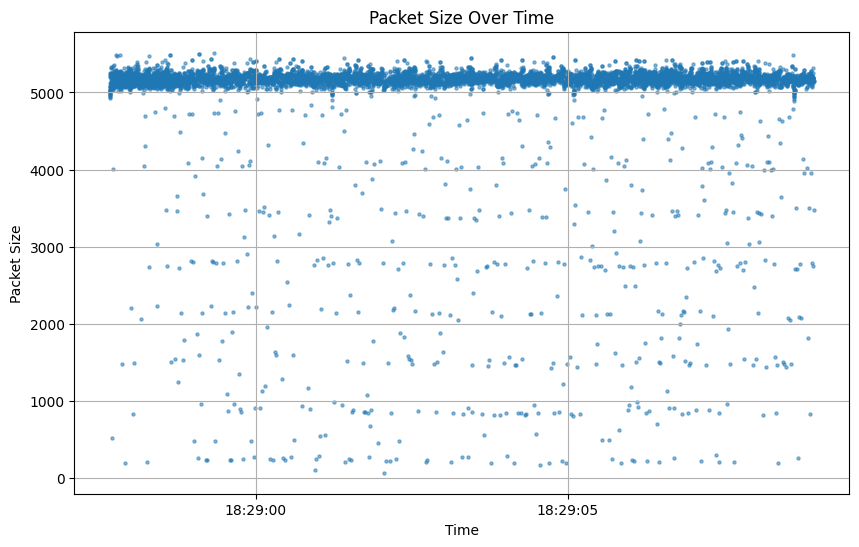

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных из CSV-файла
data = pd.read_csv('../report/received_packets.csv')

data['Time'] = pd.to_datetime(data['Time'], unit='ms')

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['Time'], data['Size'], s=5, alpha=0.5)
plt.title('Packet Size Over Time')
plt.xlabel('Time')
plt.ylabel('Packet Size')
plt.grid(True)
plt.show()

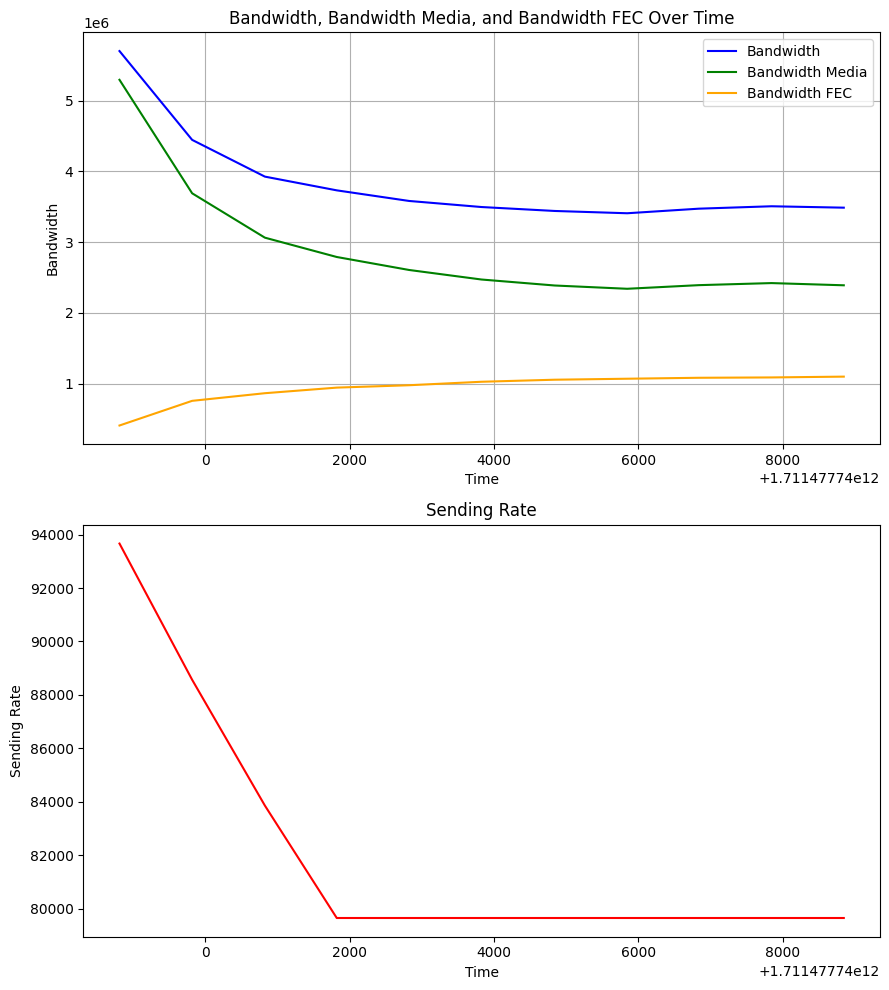

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных из CSV-файла
data = pd.read_csv('../report/sender_packets.csv')

# Вычисление Bandwidth FEC
data['Bandwidth FEC'] = data['Bandwidth'] - data['Bandwidth Media']

# Построение графика
plt.figure(figsize=(9, 10))

plt.subplot(2, 1, 1)
plt.plot(data['Time'], data['Bandwidth'], label='Bandwidth', color='blue')
plt.plot(data['Time'], data['Bandwidth Media'], label='Bandwidth Media', color='green')
plt.plot(data['Time'], data['Bandwidth FEC'], label='Bandwidth FEC', color='orange')
plt.title('Bandwidth, Bandwidth Media, and Bandwidth FEC Over Time')
plt.xlabel('Time')
plt.ylabel('Bandwidth')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data['Time'], data['Sending Rate'], color='red')
plt.title('Sending Rate')
plt.xlabel('Time')
plt.ylabel('Sending Rate')

plt.tight_layout()
plt.show()